In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train shape", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


In [ ]:
#Building the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
#Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Now we're training the model using model.fit

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2973 - accuracy: 0.9143 - val_loss: 0.1415 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1448 - accuracy: 0.9572 - val_loss: 0.1052 - val_accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1097 - accuracy: 0.9665 - val_loss: 0.0944 - val_accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0912 - accuracy: 0.9718 - val_loss: 0.0784 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0768 - accuracy: 0.9764 - val_loss: 0.0715 - val_accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0662 - accuracy: 0.9789 - val_loss: 0.0728 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.0690 - val_accuracy

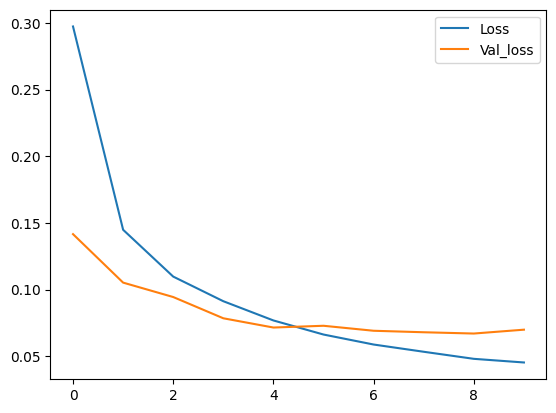

In [ ]:
#Plotting  loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_loss')
plt.legend()

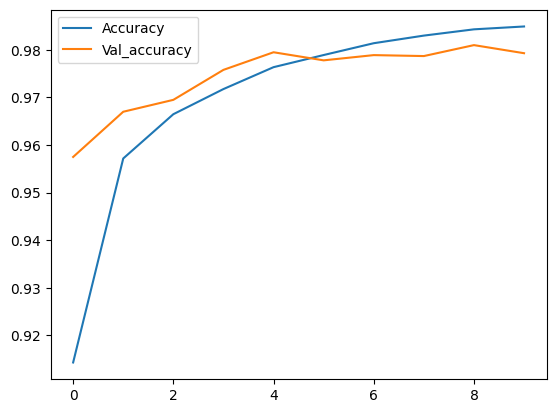

In [ ]:
#Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_accuracy')
plt.legend()

In [ ]:
#Evaluating the model

print(model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0699 - accuracy: 0.9793
[0.06985696405172348, 0.9793000221252441]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 969    0    1    1    0    1    4    1    3    0]
 [   0 1127    3    1    0    1    1    0    2    0]
 [   2    3 1005    6    3    0    2    6    5    0]
 [   0    0    2  997    0    1    0    5    2    3]
 [   1    0    2    1  948    0    4    2    1   23]
 [   2    0    0   14    2  866    4    0    3    1]
 [   2    2    0    1    3    7  942    0    1    0]
 [   2    3    9    4    0    0    0 1002    0    8]
 [   2    0    1    7    4    4    1    3  947    5]
 [   1    3    0    4    6    3    0    1    1  990]]


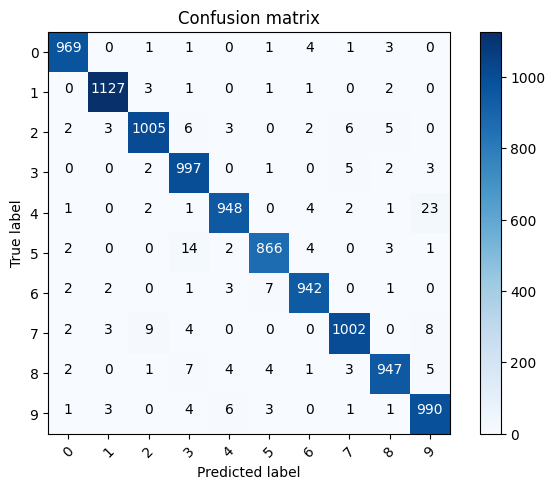

In [ ]:
#Plot the confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

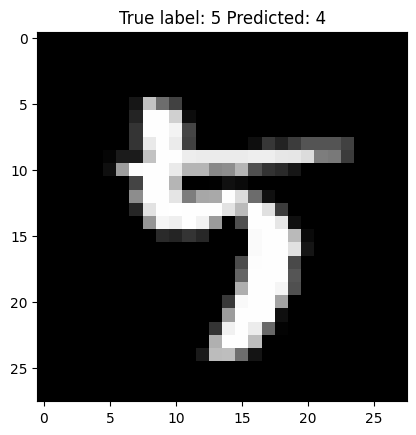

In [ ]:
#Showing all the misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

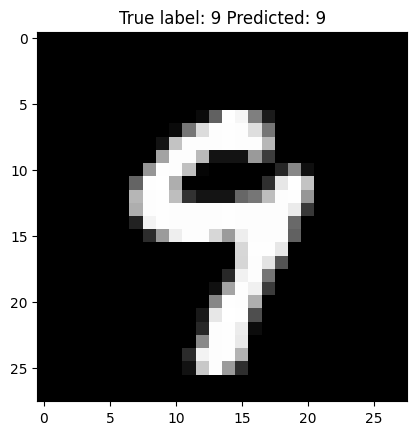

In [ ]:
#Showing all the correctly classified examples

classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));